Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 256)            271360    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 796,929
Trainable params: 796,929
Non-trainable params: 0
_________________________________________________________________
None
Train on 500 samples, validate on 281 samples
Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 0.0045 - val_loss: 0.0414
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 0.0113 - val_loss: 0.0086
Epoch 3/200
500/500 [==============================] - 1s 1ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 4/200
500/500 [=========================

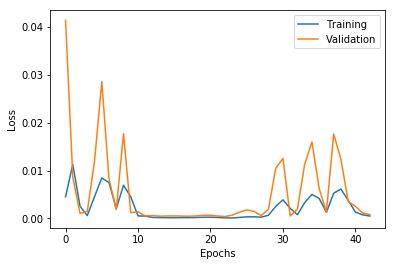

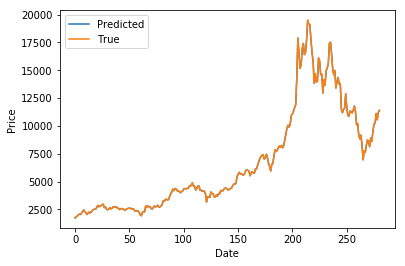

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

bitcoin_data = pd.read_csv('bitcoin.csv', header = 0, parse_dates=['Date'])
bitcoin_data['Year'] = bitcoin_data['Date'].apply(lambda x: x.year)
bitcoin_data['Month'] = bitcoin_data['Date'].apply(lambda x: x.month)
bitcoin_data = bitcoin_data.loc[bitcoin_data['Date'] > datetime(2016,1,1)]
bitcoin_data.head(3)
bitcoin_data = bitcoin_data.sort_values('Date')
bitcoin_data = bitcoin_data.set_index('Date')


df_train = bitcoin_data[0:500]
df_test = bitcoin_data[500:]

scaler = MinMaxScaler()


training_set = df_train.values
training_set = scaler.fit_transform(training_set)
X_train = np.reshape(training_set, (len(training_set),1, df_train.shape[1]))
Y_train = training_set[:,0]


test_set = df_test.values
test_set = scaler.fit_transform(test_set)
X_test = np.reshape(test_set, (len(test_set),1, df_train.shape[1]))
Y_test = test_set[:,0]

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

print(model.summary())

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=200, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

prediction = model.predict(X_test)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
Y_test = Y_test.reshape((len(Y_test), 1))

inv_prediction = np.concatenate((prediction, X_test[:, 1:]), axis=1)
inv_prediction = scaler.inverse_transform(inv_prediction)
inv_prediction = inv_prediction[:,3]

Y_test_inverse = np.concatenate((Y_test, X_test[:, 1:]), axis=1)
Y_test_inverse = scaler.inverse_transform(Y_test_inverse)
Y_test_inverse = Y_test_inverse[:,3]

plt.figure()
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(inv_prediction, c='C0')
plt.plot(Y_test_inverse, c= 'C1')
plt.legend(['Predicted', 'True'])

In [2]:
bitcoin_data.head(10)

,Open,High,Low,Close,Volume,Market Cap,Year,Month
Date,,,,,,,,
2016-01-02,434.62,436.06,431.87,433.44,30096600.0,6.533630e+09,2016,1
2016-01-03,433.58,433.74,424.71,430.01,39633800.0,6.519500e+09,2016,1
2016-01-04,430.06,434.52,429.08,433.09,38477500.0,6.468180e+09,2016,1
2016-01-05,433.07,434.18,429.68,431.96,34522600.0,6.515380e+09,2016,1
2016-01-06,431.86,431.86,426.34,429.11,34042500.0,6.498830e+09,2016,1
2016-01-07,430.01,458.77,429.08,458.05,87562200.0,6.472580e+09,2016,1
2016-01-08,457.54,462.93,447.94,453.23,56993000.0,6.888600e+09,2016,1
2016-01-09,453.38,454.64,446.89,447.61,32278000.0,6.828000e+09,2016,1
2016-01-10,448.24,448.31,440.35,447.99,35995900.0,6.752210e+09,2016,1
